In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f_wb(w, x_i, b):
    '''
    prediction function f_wb = w * x_i + b
    '''
    return w * x_i + b

In [3]:
def compute_cost(x, y, w, b):
    '''
    cost function J(w, b) = (1/2m) sum 0 -> m (f_wb(x[i]) - y[x[i]])^2
    '''
    m = x.shape[0]
    sum_of_squares = 0
    for i in range(m):
        fwb = f_wb(w, x[i], b)
        y_i = y[i]
        squared_error = (fwb - y_i) ** 2
        sum_of_squares += squared_error

    total_cost = (1 / (2 * m)) * sum_of_squares
    return total_cost

In [4]:
def compute_gradients(x, y, w, b):
    '''
    J(w, b) = 1/2m sum 0 -> m (w*x + b - y[i])^2
    partial J by partial w = (1/m) * (w*x + b - y[i]) * (x)
    partial J by partial b = (1/m) * (w*x + b - y[i])
    '''
    m = x.shape[0]
    dj_db = 0
    dj_dw = 0
    for i in range(m):
        temp_dj_dw = (f_wb(w, x[i], b) - y[i]) * (x[i])
        temp_dj_db = f_wb(w, x[i], b) - y[i]
        dj_dw += temp_dj_dw
        dj_db += temp_dj_db

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

In [5]:
def gradient_descent(x_train, y_train, w_in, b_in, learning_rate, number_of_iterations, cost_function, gradient_function):


    w, b = w_in, b_in
    cost_history, parameters_history = [], []
    for i in range(number_of_iterations):
        dj_dw, dj_db = gradient_function(x_train, y_train, w, b)

        temp_w = w - (learning_rate * dj_dw)
        temp_b = b - (learning_rate * dj_db)

        w = temp_w
        b = temp_b

        if i < 10000:
            cost_history.append(cost_function(x_train, y_train, w, b))
            parameters_history.append((w, b))

        if i % 5 == 0:
            print(f"Iteration {i:4}: cost = {cost_history[-1]:0.3e}\t"
                  f"dj_dw: {dj_dw:0.3e}, dj_db: {dj_db:0.3e}\t"
                  f"w: {w:0.3e}, b: {b:0.5e}")

    return w, b, cost_history, parameters_history


In [9]:
# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 1000000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradients)

Streaming output truncated to the last 5000 lines.
Iteration 975000: cost = 6.745e-06	dj_dw: -1.421e-12, dj_db: 7.105e-13	w: 2.000e+02, b: 1.00000e+02
Iteration 975005: cost = 6.745e-06	dj_dw: -1.421e-12, dj_db: 7.105e-13	w: 2.000e+02, b: 1.00000e+02
Iteration 975010: cost = 6.745e-06	dj_dw: -1.421e-12, dj_db: 7.105e-13	w: 2.000e+02, b: 1.00000e+02
Iteration 975015: cost = 6.745e-06	dj_dw: -1.421e-12, dj_db: 7.105e-13	w: 2.000e+02, b: 1.00000e+02
Iteration 975020: cost = 6.745e-06	dj_dw: -1.421e-12, dj_db: 7.105e-13	w: 2.000e+02, b: 1.00000e+02
Iteration 975025: cost = 6.745e-06	dj_dw: -1.421e-12, dj_db: 7.105e-13	w: 2.000e+02, b: 1.00000e+02
Iteration 975030: cost = 6.745e-06	dj_dw: -1.421e-12, dj_db: 7.105e-13	w: 2.000e+02, b: 1.00000e+02
Iteration 975035: cost = 6.745e-06	dj_dw: -1.421e-12, dj_db: 7.105e-13	w: 2.000e+02, b: 1.00000e+02
Iteration 975040: cost = 6.745e-06	dj_dw: -1.421e-12, dj_db: 7.105e-13	w: 2.000e+02, b: 1.00000e+02
Iteration 975045: cost = 6.745e-06	dj_dw: -1.421e

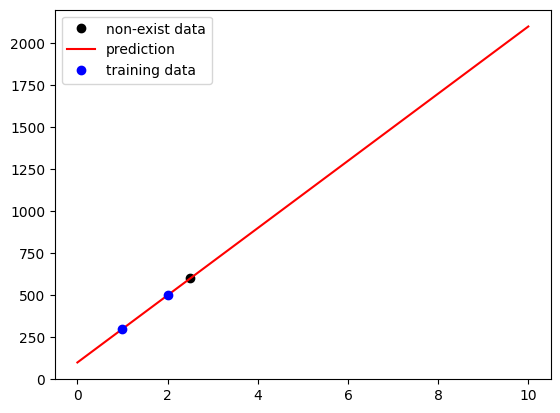

In [15]:
fig, ax = plt.subplots()
x = np.linspace(0, 10, 100)
y = w_final * x + b_final
pred = w_final * 2.5 + b_final
ax.plot(2.5, pred, 'o', label='non-exist data', color = 'black')
ax.plot(x, y, label='prediction', color = 'red')
ax.plot(x_train, y_train, 'o', label='training data', color = 'blue')
ax.legend()
plt.show()